# Problem 5 - Sea Level Predictor

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Import data
Use Pandas to import the data from "epa-sea-level.csv"

In [64]:
df = pd.read_csv('epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


#### Plot a Scatter Plot
Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis. Using the linregress function draw a line of best fit. Extened the line to the year 2050

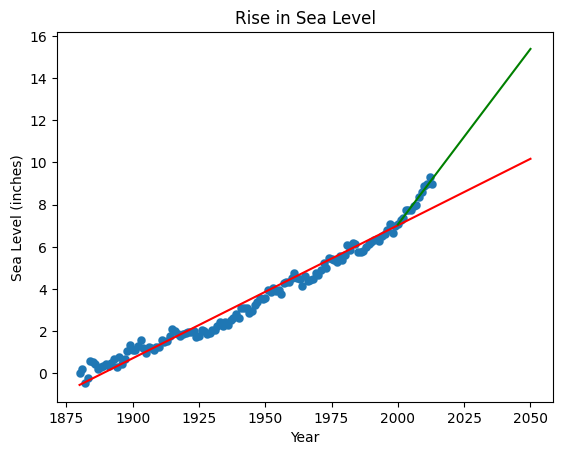

In [65]:
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df, linewidths=0.1)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

x = df['Year']
y = df['CSIRO Adjusted Sea Level']

slope, intercept, r_value, p_value, std_err = linregress(x,y)

extended = pd.Series(range(1880, 2051, 1))

future_line = [slope*oldx + intercept for oldx in extended]

plt.plot(extended, future_line, 'r', label='fitted line')

sample = df[df['Year'] >= 2000]

sample_dates = pd.Series(range(2000, 2051, 1))

sample_slope, sample_intercept, sample_r_value, sample_p_value, sample_std_err = linregress(sample['Year'],sample['CSIRO Adjusted Sea Level'])

line = [sample_slope*oldx + sample_intercept for oldx in sample['Year']]

sample_line = [sample_slope*oldx + sample_intercept for oldx in sample_dates]

if sample_slope >= slope:
    plt.plot(sample_dates, sample_line, 'g', label='fitted line')
else:
    plt.plot(sample['Year'], line, 'g', label='fitted line')
